In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import v_measure_score

1. Сгенерировать себе 2D набор данных используя встроенные функции sklearn


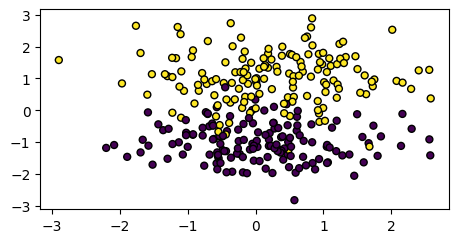

In [65]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(324)
# plt.title("Multi-class, two informative features, one cluster", fontsize="small")
X, Y_true = make_classification(n_samples=300, n_features=5, n_informative=2,
                                 n_redundant=0, n_clusters_per_class=1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y_true, s=25, edgecolor="k")

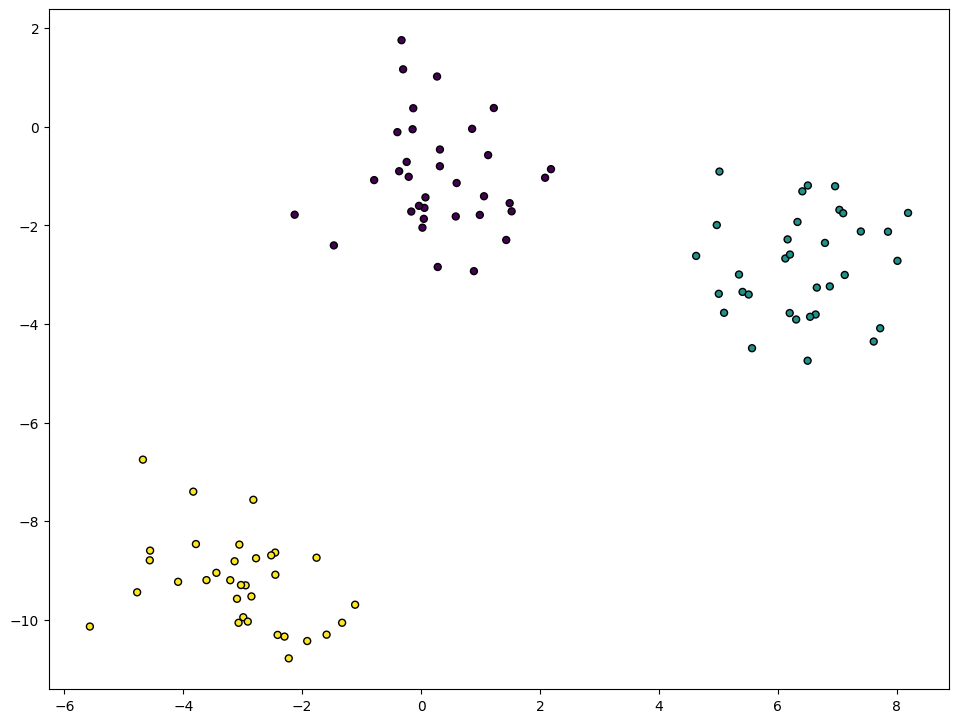

In [4]:
plt.figure(figsize=(10, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

X, Y_true = make_blobs()
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y_true, s=25, edgecolor="k")

2. Применить методы кластеризации K-Mean, MeanShift, DBSCAN
3. Померить качество кластеризации с помощью индекса Дунна. Так же измерить V-меру и Коэффициент силуэта.



In [5]:
def δ(ck, cl):
    values = np.ones([len(ck), len(cl)])
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
    return np.min(values)

In [6]:
def Δ(ci):
    values = np.zeros([len(ci), len(ci)])
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
    return np.max(values)

In [7]:
def dunn(k_list):
    δs = np.ones([len(k_list), len(k_list)])
    Δs = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            δs[k, l] = δ(k_list[k], k_list[l])
            Δs[k] = Δ(k_list[k])
            di = np.min(δs)/np.max(Δs)
    return di

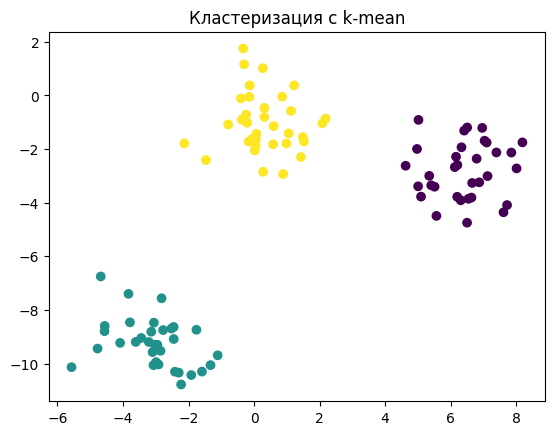

Силуэтный коэффициент: 0.7470175259027455
V-мера: 1.0
Индекс Дунна: 0.206655631930539


In [9]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 3, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Кластеризация с k-mean')
plt.show()

k_list = [X[labels == i] for i in range(kmeans.n_clusters)]

silhouette_avg = silhouette_score(X, labels)
v_measure = v_measure_score(Y_true, labels)
dunn_score = dunn(k_list)

print(f"Силуэтный коэффициент: {silhouette_avg}")
print(f"V-мера: {v_measure}")
print(f"Индекс Дунна: {dunn_score}")

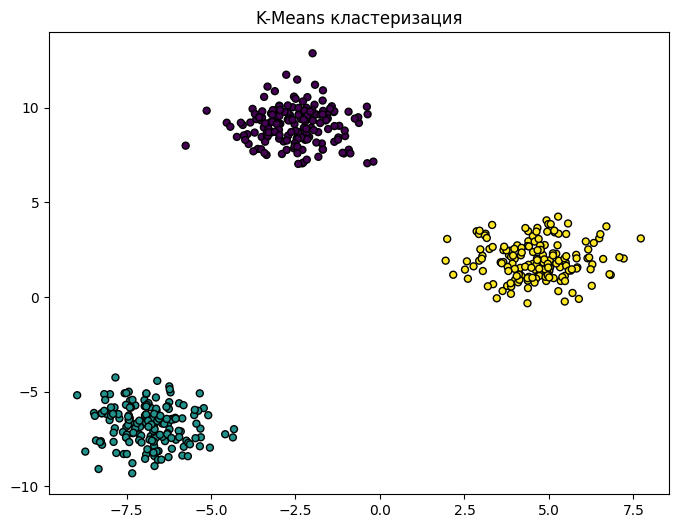

Силуэтный коэффициент: 0.844
V-мера: 1.000
Индекс Дунна: 0.162


In [10]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, v_measure_score
import matplotlib.pyplot as plt
import numpy as np

# Генерация данных
X, Y_true = make_blobs(n_samples=500, random_state=42)
# plt.subplot(325)
# plt.title("Three blobs", fontsize="small")
# X, Y1 = make_blobs(n_features=2, centers=3)
# plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# Применение K-Means
n_clusters = len(np.unique(Y_true))  # Количество кластеров = количество классов
kmeans = KMeans(n_clusters = 3)
labels = kmeans.fit_predict(X)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=25, edgecolor="k")
plt.title("K-Means кластеризация")
plt.show()

# Оценка качества кластеризации

# 1. Силуэтный коэффициент
silhouette_avg = silhouette_score(X, labels)
print(f"Силуэтный коэффициент: {silhouette_avg:.3f}")

# 2. V-мера (нужны истинные метки кластеров)
v_measure = v_measure_score(Y_true, labels)
print(f"V-мера: {v_measure:.3f}")

k_list = [X[labels == i] for i in range(kmeans.n_clusters)]

# v_measure = v_measure_score(Y_true, labels)
dunn_score = dunn(k_list)

print(f"Индекс Дунна: {dunn_score:.3f}")


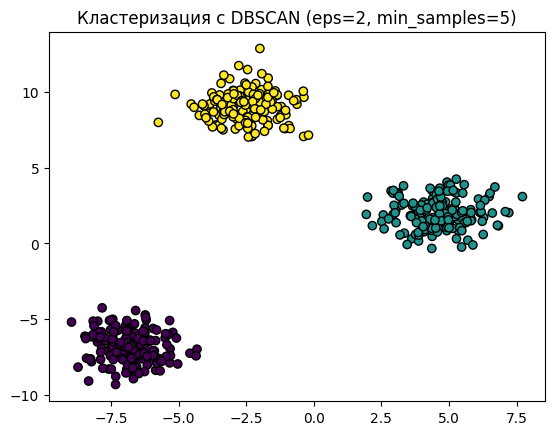

Силуэтный коэффициент: 0.8437565906781406
V-мера: 1.0
Индекс Дунна: 0.16244345008920227


In [13]:
from sklearn.cluster import DBSCAN

# Кластеризация DBSCAN
eps = 2  # Параметр eps (радиус соседства)
min_samples = 5  # Минимальное количество точек в кластере
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
labels = dbscan.labels_

# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title(f'Кластеризация с DBSCAN (eps={eps}, min_samples={min_samples})')
plt.show()

unique_labels = np.unique(labels)


k_list = [X[labels == i] for i in range(len(unique_labels))]

# v_measure = v_measure_score(Y_true, labels)
dunn_score = dunn(k_list)
# V-мера (работает только если есть истинные метки)
v_measure = v_measure_score(Y_true, labels)
silhouette_avg = silhouette_score(X, labels)

print(f"Силуэтный коэффициент: {silhouette_avg}")
print(f"V-мера: {v_measure}")
print(f"Индекс Дунна: {dunn_score}")


<ipython-input-18-1b9a095dee63>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


3


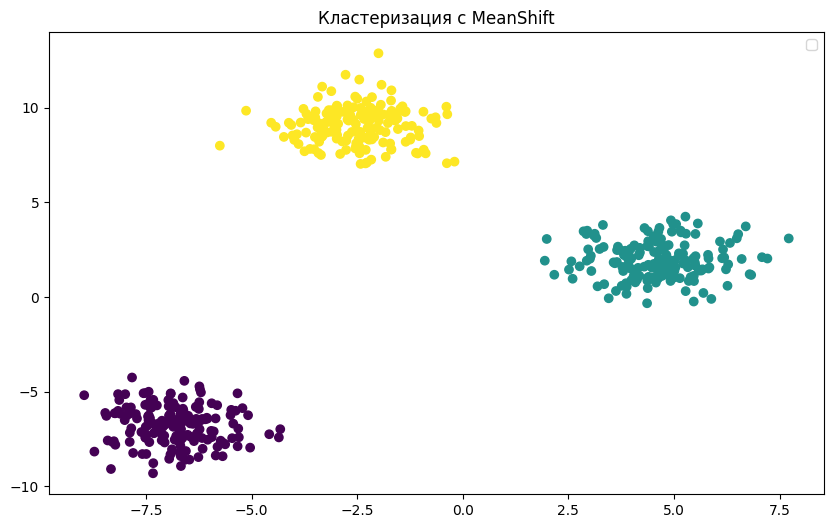

Силуэтный коэффициент: 0.8437565906781406
V-мера: 1.0
Индекс Дунна: 0.16244345008920227


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Настройка и выполнение кластеризации Mean Shift
mean_shift = MeanShift()
labels = mean_shift.fit_predict(X)

# Определение уникальных меток кластеров
unique_labels = np.unique(labels)

# Определение цветов для каждого кластера
colors = plt.cm.get_cmap('viridis', len(unique_labels))

# Визуализация гистограммы для каждого кластера
plt.figure(figsize=(10, 6))

print(len(unique_labels))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Кластеризация с MeanShift')
plt.legend()
plt.show()

k_list = [X[labels == i] for i in range(len(unique_labels))]

dunn_score = dunn(k_list)
# V-мера (работает только если есть истинные метки)
v_measure = v_measure_score(Y_true, labels)
silhouette_avg = silhouette_score(X, labels)

print(f"Силуэтный коэффициент: {silhouette_avg}")
print(f"V-мера: {v_measure}")
print(f"Индекс Дунна: {dunn_score}")

4. Реализовать свой метод K-Mean. Провести сравнение с библиотечным.


In [ ]:
import numpy as np

def kmeans(X, n_clusters, max_iter=300, tol=1e-4, random_state=None):
    """
    Реализация алгоритма K-Means.

    Параметры:
    ----------
    X : ndarray
        Данные для кластеризации (n_samples, n_features).
    n_clusters : int
        Количество кластеров.
    max_iter : int, optional (default=300)
        Максимальное количество итераций.
    tol : float, optional (default=1e-4)
        Допустимая погрешность для проверки сходимости.
    random_state : int, optional (default=None)
        Начальное состояние для генерации случайных чисел.

    Возвращает:
    ----------
    labels : ndarray
        Метки кластеров для каждой точки (n_samples,).
    centroids : ndarray
        Координаты центроидов (n_clusters, n_features).
    """
    # Установим seed для воспроизводимости
    if random_state is not None:
        np.random.seed(random_state)

    # Шаг 1: Случайная инициализация центроидов
    n_samples, n_features = X.shape
    initial_indices = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = X[initial_indices]

    for iteration in range(max_iter):
        # Шаг 2: Назначение каждой точки к ближайшему центроиду
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Шаг 3: Обновление центроидов
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Проверка на сходимость
        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Сходимость достигнута за {iteration} итераций.")
            break

        centroids = new_centroids

    return labels, centroids



5. Сгенерировать набор данных высокой размерности (к примеру 15). Затем итеративно уменьшать размерность данных на 1 до размерности 2 и оценивать точность работы K-Mean. Сравнить точности. Возможно будет долго работать, тогда можно начать с размерности 12 или 10

Размерность: 15, Силуэтный коэффициент: 0.8213
Размерность: 14, Силуэтный коэффициент: 0.8261
Размерность: 13, Силуэтный коэффициент: 0.8316
Размерность: 12, Силуэтный коэффициент: 0.8374
Размерность: 11, Силуэтный коэффициент: 0.8436
Размерность: 10, Силуэтный коэффициент: 0.8505
Размерность: 9, Силуэтный коэффициент: 0.8579
Размерность: 8, Силуэтный коэффициент: 0.8661
Размерность: 7, Силуэтный коэффициент: 0.8749
Размерность: 6, Силуэтный коэффициент: 0.8848
Размерность: 5, Силуэтный коэффициент: 0.8963
Размерность: 4, Силуэтный коэффициент: 0.9093
Размерность: 3, Силуэтный коэффициент: 0.9252
Размерность: 2, Силуэтный коэффициент: 0.9206


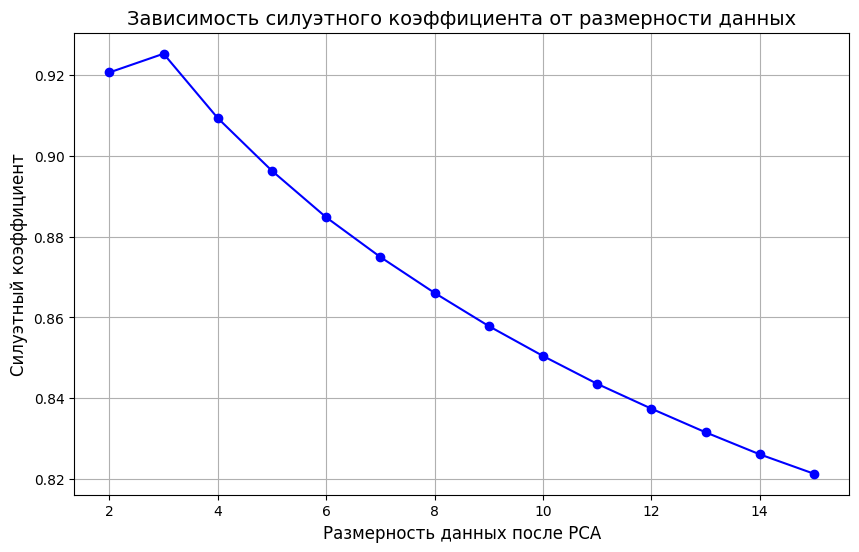

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Шаг 1: Генерация данных
n_samples = 1000
n_features = 15  # Начальная размерность
n_clusters = 4
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# Сохранение для анализа
silhouette_scores = []
dimensions = list(range(n_features, 1, -1))  # Уменьшаем размерность от 15 до 2

# Шаг 2: Итеративное уменьшение размерности с помощью PCA
for dim in dimensions:
    # Применение PCA для уменьшения размерности
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X)

    # Кластеризация K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(X_reduced)
    labels = kmeans.labels_

    # Оценка качества кластеризации
    silhouette_avg = silhouette_score(X_reduced, labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Размерность: {dim}, Силуэтный коэффициент: {silhouette_avg:.4f}")

# Шаг 3: Построение графика изменения силуэтного коэффициента
plt.figure(figsize=(10, 6))
plt.plot(dimensions, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Зависимость силуэтного коэффициента от размерности данных", fontsize=14)
plt.xlabel("Размерность данных после PCA", fontsize=12)
plt.ylabel("Силуэтный коэффициент", fontsize=12)
plt.grid(True)
plt.show()
